In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dfHist = pd.read_csv("E:\RADMEP_stuff\Semester_2_KU_Leuven\KU_Leuven_learn\Image_sensor\CIS_Lab_Python_code_v2\Save_Data\hist_ori.csv")

hist = np.array(dfHist['hist'].dropna())
bin_edges = np.array(dfHist['bin_edges'].dropna())
histmax = np.array(dfHist['histmax'].dropna())


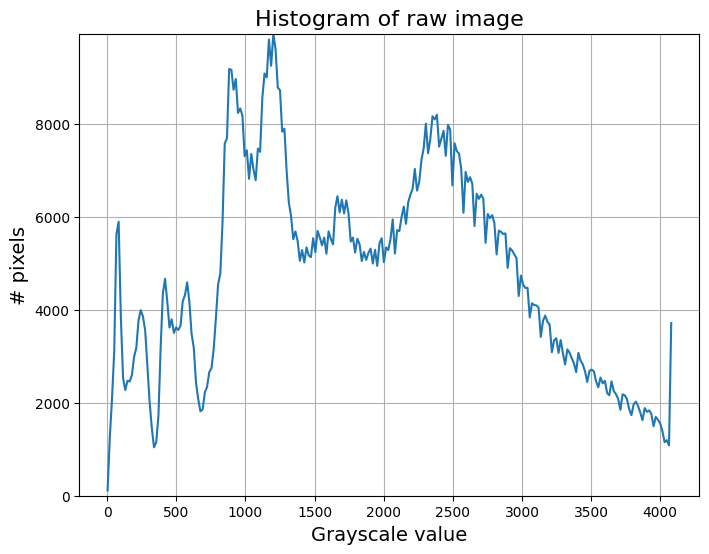

In [8]:
fighistlin = plt.figure(figsize=(8,6))
plt.title("Histogram of raw image", fontsize = 16)
plt.xlabel("Grayscale value", fontsize = 14)
plt.ylabel("# pixels", fontsize = 14)
plt.ylim([0, histmax])
plt.grid(True)
plt.plot(bin_edges[0:-1], hist)

plt.show()

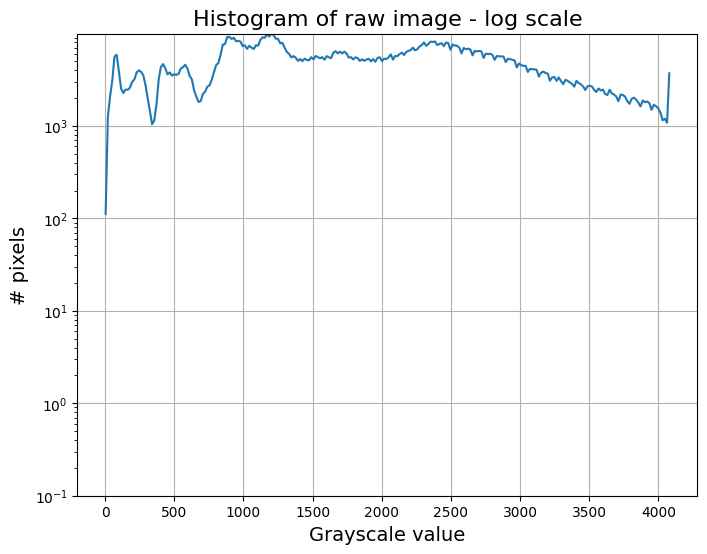

In [9]:
fighistlog = plt.figure(figsize = (8,6))
plt.title("Histogram of raw image - log scale", fontsize = 16)
plt.xlabel("Grayscale value", fontsize = 14)
plt.ylabel("# pixels", fontsize = 14)
plt.ylim([0.1, histmax])
plt.grid(True)
plt.plot(bin_edges[0:-1], hist)
plt.yscale('log')
plt.show()

In [12]:
dfPTC = pd.read_csv("E:\RADMEP_stuff\Semester_2_KU_Leuven\KU_Leuven_learn\Image_sensor\CIS_Lab_Python_code_v2\Save_Data\PTC_stuff_ori.csv")

immean = np.array(dfPTC["immean"].dropna())
imvar = np.array(dfPTC["imvar"].dropna())
x = np.array(dfPTC["x"].dropna())
y = np.array(dfPTC["y"].dropna())
wx = np.array(dfPTC["wx"].dropna())
p = np.array(dfPTC["p"].dropna())
z = np.polyfit(immean, imvar, 1)
w, _, _, _ = np.linalg.lstsq(immean[:,np.newaxis], imvar, rcond=None)
wsqrt, _, _, _ = np.linalg.lstsq(immean[:,np.newaxis], imvar, rcond=None)

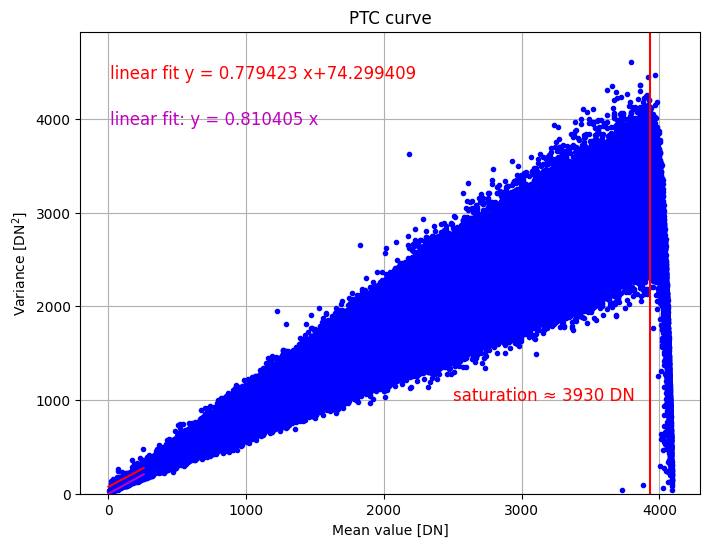

In [39]:
figPTClin= plt.figure(figsize=(8,6))
plt.title("PTC curve")
plt.xlabel("Mean value [DN]")
plt.ylabel("Variance [DN$^2$]")
plt.grid(True)
plt.plot(immean, imvar, '.b')
plt.plot(x, y, 'r')
plt.plot(x, wx, 'm')
plt.ylim([0, (p * 18)]) # default times 1.25
ypos = (plt.gca().get_ylim())[1]
text = "linear fit y = %3f x+%3f" % (z[0], z[1])
plt.text(10, ypos * 0.9, text, fontsize=12, color='r')
text = "linear fit: y = %3f x" % w[0]
plt.text(10, ypos * 0.8, text, fontsize=12, color='m')
plt.vlines(3930, 0,5000, color = 'r')
plt.text(2500, 1000, 'saturation ≈ 3930 DN', fontsize = 12, color = 'r')
plt.show(block=False)

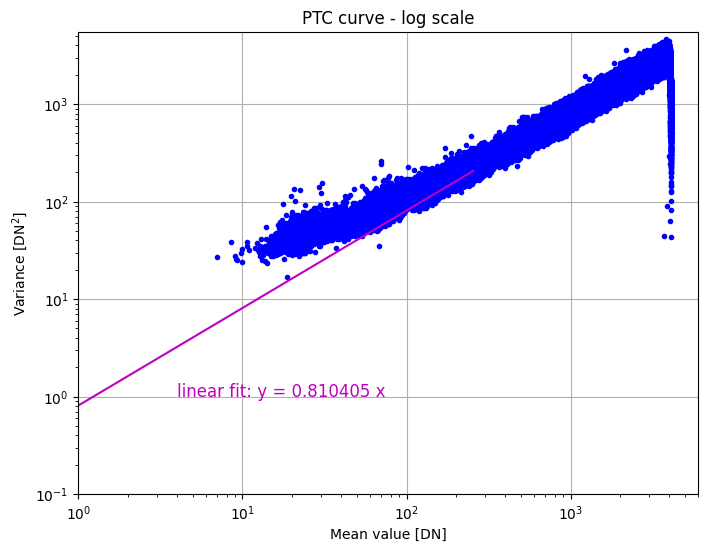

In [53]:
figPTClog = plt.figure(figsize = (8,6))
plt.title("PTC curve - log scale")
plt.xlabel("Mean value [DN]")
plt.ylabel("Variance [DN$^2$]")
plt.grid(True)
plt.ylim([0.1, (p * 20)]) # default times 2
plt.xlim([1, 6000])
plt.yscale('log')
plt.xscale('log')
plt.plot(immean, imvar, '.b')
#            plt.plot(x,y,'r')
plt.plot(x, wx, 'm')
ypos = (plt.gca().get_ylim())[1]
xpos = (plt.gca().get_xlim())[0]
#            text = "linear fit y = %3f x+%3f" % (z[0],z[1])
#            plt.text(10, ypos*0.9, text, fontsize = 12, color = 'r')
text = "linear fit: y = %3f x" % w[0]
plt.text(xpos * 4, 1, text, fontsize=12, color='m')
#plt.hlines(y = 20,xmin = 0.01, xmax=10000, color = 'b')
#plt.vlines(8, 0.001, 1e4, color = 'b')
#plt.text(10, 1000, 'signal offset ≈ 8 DN', fontsize = 12, color = 'b')
#plt.text(100, 10, "noise floor ≈ 20 DN", fontsize = 12, color = 'b')
plt.show(block=False)

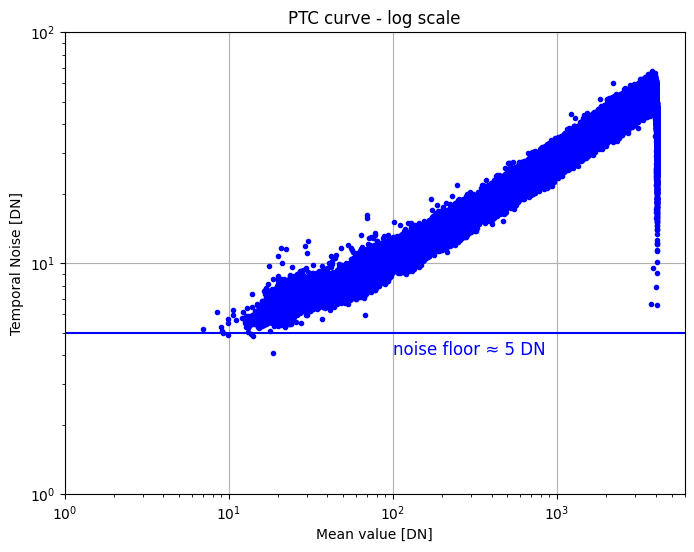

In [51]:
figPTClogsqrt = plt.figure(figsize = (8,6))
plt.title("PTC curve - log scale")
plt.xlabel("Mean value [DN]")
plt.ylabel("Temporal Noise [DN]")
plt.grid(True)
plt.ylim([1, 100]) # default times 2
plt.xlim([1, 6000])
plt.yscale('log')
plt.xscale('log')
plt.plot(immean, np.sqrt(imvar), '.b')
#            plt.plot(x,y,'r')
#plt.plot(x, wx, 'm')
ypos = (plt.gca().get_ylim())[1]
xpos = (plt.gca().get_xlim())[0]
#            text = "linear fit y = %3f x+%3f" % (z[0],z[1])
#            plt.text(10, ypos*0.9, text, fontsize = 12, color = 'r')
#text = "linear fit: y = %3f x" % w[0]
#plt.text(xpos * 4, 1, text, fontsize=12, color='m')
plt.hlines(y = 5,xmin = 0.01, xmax=10000, color = 'b')
#plt.vlines(8, 0.001, 1e4, color = 'b')
#plt.text(10, 50, 'signal offset ≈ 8 DN', fontsize = 12, color = 'b')
plt.text(100, 4, "noise floor ≈ 5 DN", fontsize = 12, color = 'b')
plt.show(block=False)

In [84]:
DN = 1/(2**12)
sig_array = np.linspace(0,3930, 1000)
sigma_read = 4.54 # electrons
k = 0.7794 # DN/electron

def SNR(signal):
    return signal/(np.sqrt((k**2)*(sigma_read**2) + k*signal)) # everything is in DN

def noise(signal):
    return (np.sqrt((k**2)*(sigma_read**2) + k*signal))



SNR_curve = 20*np.log10(SNR(sig_array))
noise_curve = noise(sig_array)


C:\Users\cahya\AppData\Local\Temp\ipykernel_14268\890708940.py:14: RuntimeWarning: divide by zero encountered in log10
  SNR_curve = 20*np.log10(SNR(sig_array))


In [85]:
SNR_curve[-1]

37.008604996784314

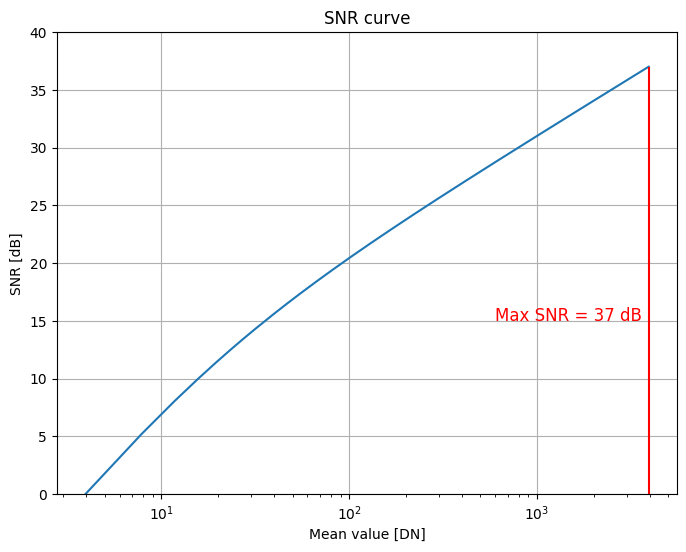

In [91]:
figSNR = plt.figure(figsize = (8,6))
plt.title("SNR curve")
plt.xlabel("Mean value [DN]")
plt.ylabel("SNR [dB]")
plt.grid(True)
plt.ylim([0,40])
#plt.yscale('log')
plt.xscale('log')
plt.plot(sig_array, SNR_curve)
plt.vlines(3930, 0, SNR_curve[-1], color = 'r')
plt.text(600, 15, "Max SNR = 37 dB", fontsize = 12, color = 'r')
plt.show()

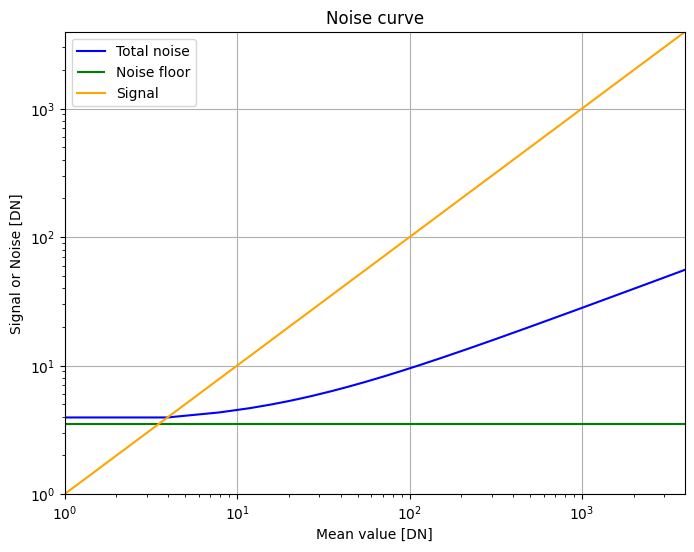

In [87]:
figNoise = plt.figure(figsize = (8,6))
plt.title("Noise curve")
plt.xlabel("Mean value [DN]")
plt.ylabel("Signal or Noise [DN]")
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.xlim([1,3930])
plt.ylim([1,3930])
plt.plot(sig_array, noise_curve, color = 'blue', label = 'Total noise')
plt.hlines(k*sigma_read, 0, 3930, color = 'green', label = 'Noise floor')
plt.plot(sig_array, sig_array, color = 'orange', label = 'Signal')
plt.legend()
plt.show()